In [612]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statistics as stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import silhouette_score
import warnings

warnings.filterwarnings('ignore')

In [613]:
sheet1 = pd.read_excel('data.xlsx', 0)
sheet2 = pd.read_excel('data.xlsx', 1)

In [614]:
db = pd.concat([sheet1, sheet2])

In [615]:
db = pd.read_excel('data.xlsx')
db.to_csv('data.csv', index=False)

In [616]:
db.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [617]:
db.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525460,538171,21931,JUMBO STORAGE BAG SUKI,2,2010-12-09 20:01:00,1.95,17530.0,United Kingdom


In [618]:
db.shape

(525461, 8)

In [619]:
db.dtypes

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object

In [620]:
db.isnull().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

In [621]:
db.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
525456    False
525457    False
525458    False
525459    False
525460    False
Length: 525461, dtype: bool

In [622]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [623]:
db.dropna(inplace=True)

In [624]:
db.shape

(417534, 8)

In [625]:
db.nunique()

Invoice        23587
StockCode       4031
Description     4459
Quantity         500
InvoiceDate    21786
Price            664
Customer ID     4383
Country           37
dtype: int64

In [626]:
#There is no target varibale for clustering
#Dropped non values as there is a sufficient amount of data to work with

In [627]:
first = [489434,12,2.95, 17530.0]
second = [489434,12,6.75, 13085.0]
total = 0
for i in range(len(first)):
    print((first[i]-second[i])**2)
    total += (first[i]-second[i])**2
total ** 0.5

0
0
14.44
19758025.0


4445.001624296667

Extremely far away due to the last feature.

In [628]:
db.drop(['Customer ID'], axis=1)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,United Kingdom
...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,United Kingdom


In [629]:
price = db['Price']
countries = db['Country']
label_encoder = LabelEncoder()
countries_encoded = label_encoder.fit_transform(countries) + 1 

In [630]:
country_mapping = {country: i + 1 for i, country in enumerate(sorted(countries.unique()))}
countries_encoded = countries.map(country_mapping)

In [631]:
db['countries_encoded'] = countries_encoded

In [632]:
db.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,countries_encoded
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,35
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,35
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,35
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,35
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,35


In [633]:
first = [489434,12,2.95, 35]
second = [489434,12,6.75, 35]
total = 0
for i in range(len(first)):
    print((first[i]-second[i])**2)
    total += (first[i]-second[i])**2
total ** 0.5

0
0
14.44
0


3.8

Points are now far closer.

## How many clusters needed?

In [634]:
db_new = db.drop(['StockCode', 'Description', 'InvoiceDate', 'Country', 'Customer ID'], axis=1)

In [635]:
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)

In [636]:
reshape = np.array([489434, 12, 2.95, 35]).reshape(-1, 1)  # Reshape into a 2D array with a single column

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3,)  # Example: using 3 clusters
cluster_labels = kmeans.fit_predict(reshape)

print(cluster_labels)

[1 0 0 2]


In [637]:
db_new

,Invoice,Quantity,Price,countries_encoded
0,489434,12,6.95,35
1,489434,12,6.75,35
2,489434,12,6.75,35
3,489434,48,2.10,35
4,489434,24,1.25,35
...,...,...,...,...
525456,538171,2,2.95,35
525457,538171,1,3.75,35
525458,538171,1,3.75,35
525459,538171,2,3.75,35


In [638]:
db['Price'] = pd.to_numeric(db['Price'], errors='coerce')

In [639]:
db_new = db_new[pd.to_numeric(db['Invoice'], errors='coerce').notnull()]

In [640]:
db_new

,Invoice,Quantity,Price,countries_encoded
0,489434,12,6.95,35
1,489434,12,6.75,35
2,489434,12,6.75,35
3,489434,48,2.10,35
4,489434,24,1.25,35
...,...,...,...,...
525456,538171,2,2.95,35
525457,538171,1,3.75,35
525458,538171,1,3.75,35
525459,538171,2,3.75,35


In [641]:
wcss = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(db_new)
    wcss.append(kmeans.inertia_)
print(wcss)

[19724289018549.0, 9042867319466.754, 5156571191421.281, 3165748005331.1265, 2231091814848.6094, 1655594938295.636, 1256892078042.2795, 999878770129.0573]


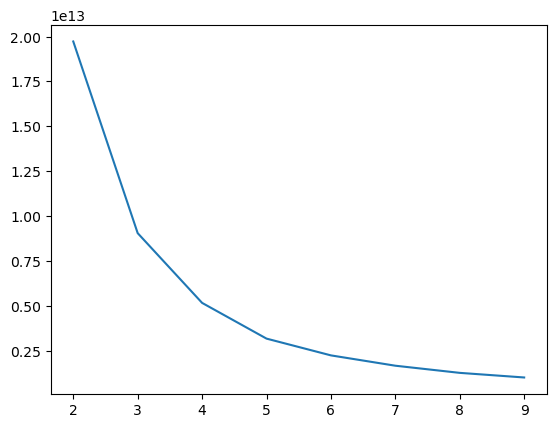

In [642]:
plt.plot(range(2,10), wcss);

Biggest change is at 3, this means that 3 clusters would suit this dataframe best.

4 and 5 also hold an exaggerated bend.

In [643]:
db_new_df = pd.DataFrame(data=db_new)

In [644]:
scaler = StandardScaler()

In [645]:
numeric_columns = db_new_df.select_dtypes(include='number').columns
db_new_df[numeric_columns] = scaler.fit_transform(db_new_df[numeric_columns])

In [646]:
selected_columns = list(db_new_df.columns[1:6]) # Adjust column indices as needed
db_new2 = db_new_df[selected_columns]

In [647]:
new_df = pd.DataFrame(data=db_new2, columns=selected_columns)

In [648]:
new_df

,Quantity,Price,countries_encoded
0,-0.016384,0.105183,0.292243
1,-0.016384,0.099429,0.292243
2,-0.016384,0.099429,0.292243
3,0.355355,-0.034359,0.292243
4,0.107529,-0.058814,0.292243
...,...,...,...
525456,-0.119645,-0.009903,0.292243
525457,-0.129971,0.013114,0.292243
525458,-0.129971,0.013114,0.292243
525459,-0.119645,0.013114,0.292243


In [649]:
new_df.describe()

,Quantity,Price,countries_encoded
count,4.076950e+05,4.076950e+05,4.076950e+05
mean,1.488815e-14,-3.250159e-15,-2.886835e-14
std,1.000001e+00,1.000001e+00,1.000001e+00
min,-1.299712e-01,-9.477873e-02,-5.154375e+00
25%,-1.196451e-01,-5.881435e-02,2.922427e-01
50%,-8.866686e-02,-3.867430e-02,2.922427e-01
75%,-1.638426e-02,1.311441e-02,2.922427e-01
max,1.976249e+02,3.150539e+02,6.126319e-01


In [650]:
y_pred = kmeans.fit_predict(new_df)

In [651]:
kmeans.cluster_centers_

array([[-4.27825987e-02, -7.18001511e-03,  2.78368407e-01],
       [ 4.15867055e-02,  1.28458177e-02, -3.41864429e+00],
       [-1.29971208e-01,  2.91532223e+02,  2.92242681e-01],
       [ 5.03378277e+01, -8.89128648e-02, -1.90471229e+00],
       [ 1.18974551e+02, -8.61712536e-02, -2.13737592e+00],
       [-1.29971208e-01,  3.73656651e+01, -1.99053084e+00],
       [ 1.79868344e+01, -8.25878936e-02, -7.74507945e-01],
       [-1.29971208e-01,  2.00102235e+02, -1.46989829e+00],
       [ 3.28775966e+00, -5.98178455e-02, -1.05858025e-01]])

In [652]:
y_pred==0

array([ True,  True,  True, ...,  True,  True,  True])

In [653]:
new_df[y_pred==0]

,Quantity,Price,countries_encoded
0,-0.016384,0.105183,0.292243
1,-0.016384,0.099429,0.292243
2,-0.016384,0.099429,0.292243
3,0.355355,-0.034359,0.292243
4,0.107529,-0.058814,0.292243
...,...,...,...
525456,-0.119645,-0.009903,0.292243
525457,-0.129971,0.013114,0.292243
525458,-0.129971,0.013114,0.292243
525459,-0.119645,0.013114,0.292243


In [654]:
new_df.iloc[:,0]

0        -0.016384
1        -0.016384
2        -0.016384
3         0.355355
4         0.107529
            ...   
525456   -0.119645
525457   -0.129971
525458   -0.129971
525459   -0.119645
525460   -0.119645
Name: Quantity, Length: 407695, dtype: float64

In [655]:
new_df

,Quantity,Price,countries_encoded
0,-0.016384,0.105183,0.292243
1,-0.016384,0.099429,0.292243
2,-0.016384,0.099429,0.292243
3,0.355355,-0.034359,0.292243
4,0.107529,-0.058814,0.292243
...,...,...,...
525456,-0.119645,-0.009903,0.292243
525457,-0.129971,0.013114,0.292243
525458,-0.129971,0.013114,0.292243
525459,-0.119645,0.013114,0.292243


In [656]:
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the KMeans model to your data
kmeans.fit(new_df)

# Get the cluster centers
cluster_centers = kmeans.cluster_centers_

In [657]:
def plotFeatures(col1, col2):
    plt.scatter(
        new_df[y_pred==0].iloc[:,col1],
        new_df[y_pred==0].iloc[:,col2],
        s=50,
        c='red'
    )
    plt.scatter(
        new_df[y_pred==1].iloc[:,col1],
        new_df[y_pred==1].iloc[:,col2],
        s=50,
        c='blue'
    )
    plt.scatter(
        new_df[y_pred==2].iloc[:,col1],
        new_df[y_pred==2].iloc[:,col2],
        c='green'
    )
    plt.scatter(
        kmeans.cluster_centers_[:,col1],
        kmeans.cluster_centers_[:,col2],
        s=200,
        c='yellow'
    )
    xmin, xmax = plt.xlim()  # Get the current limits of the x-axis
    plt.xlim(min(xmin, 0), xmax)
    
    plt.xlabel(x.columns[col1])
    plt.ylabel(x.columns[col2])
    plt.show();

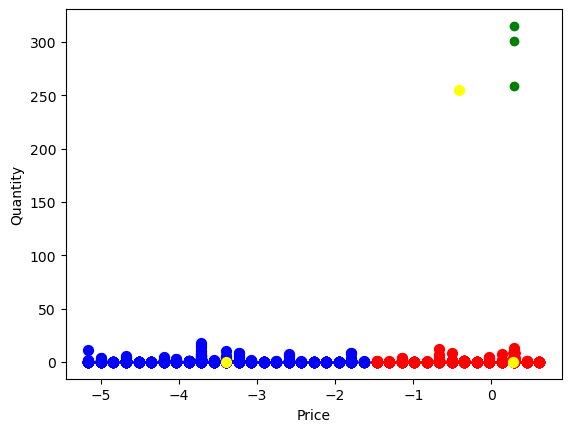

In [658]:
plotFeatures(2, 1)

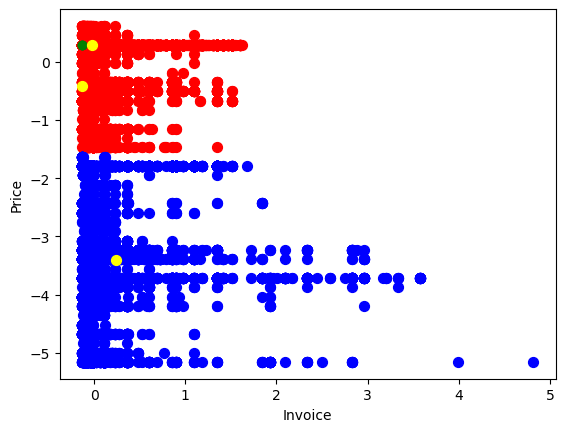

In [659]:
plotFeatures(0, 2)

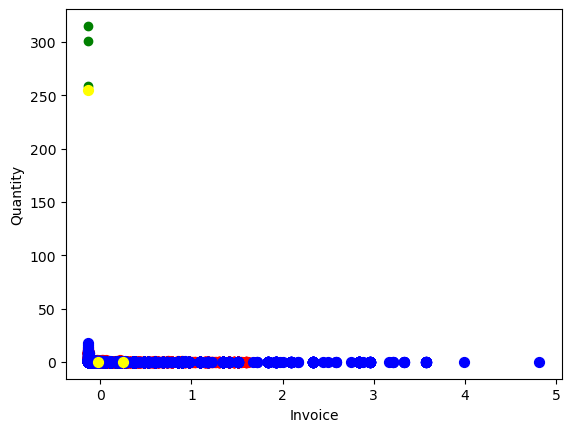

In [660]:
plotFeatures(0, 1)

## Silhouette Score

In [661]:
silhouette_score(new_df, y_pred)

0.9217820231646697

In [ ]:
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    y_pred = kmeans.fit_predict(new_df)
    print(f"The silhouette score for {k} clusters is: {silhouette_score(new_df, y_pred)}")

Excellant Silhouette score. Showing that the clusters are wll separated from each other as well as how similiar the points are within their own clusters are. The score is between -1 and +1. 0.92 is a great score.

## Market Basket Analysis (MBA)